# Question 1 : Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file **segmentation data.csv** contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups. 

### 1. Import the necessary modules

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN,k_means

### 2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

In [48]:
data = pd.read_csv("segmentation data.csv")
data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


### 3. Do the necessary preprocessing of the data.

> Drop unwanted columns.

> Check for null values.

> Scale the numerical columns.

> Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.

In [49]:
data.isnull().sum()
data.drop('ID', axis = 1, inplace=True)
from sklearn.preprocessing import StandardScaler
age_groups = [
    (1, 18, 30),
    (2, 31, 50),
    (3, 51, 100)
]

# Create a function to assign age groups
def assign_age_group(age):
    for label, min_age, max_age in age_groups:
        if min_age <= age <= max_age:
            return label
    return "Unknown"  # Handle cases outside defined groups

# Apply the function to create a new 'Age Group' column
data['Age'] = data['Age'].apply(assign_age_group)
print(data)


      Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0       0               0    3          2  124670           1                2
1       1               1    1          1  150773           1                2
2       0               0    2          1   89210           0                0
3       0               0    2          1  171565           1                1
4       0               0    3          1  149031           1                1
...   ...             ...  ...        ...     ...         ...              ...
1995    1               0    2          1  123525           0                0
1996    1               1    1          1  117744           1                0
1997    0               0    2          0   86400           0                0
1998    1               1    1          1   97968           0                0
1999    0               0    1          0   68416           0                0

[2000 rows x 7 columns]


### 4. KMeans Model Training - Scikit-Learn

At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .

How to decide for the value 'K' ?

Read the following blog. It provides different ways of evaluating clustering algorithms.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters

We will be looking on two methods : Elbow Method, Silhouette Analysis.

**Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !**

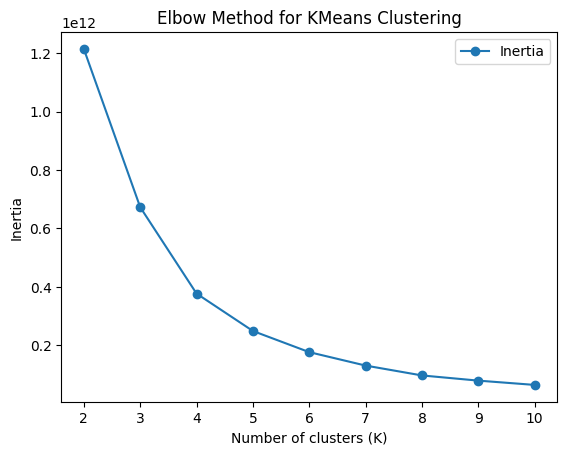

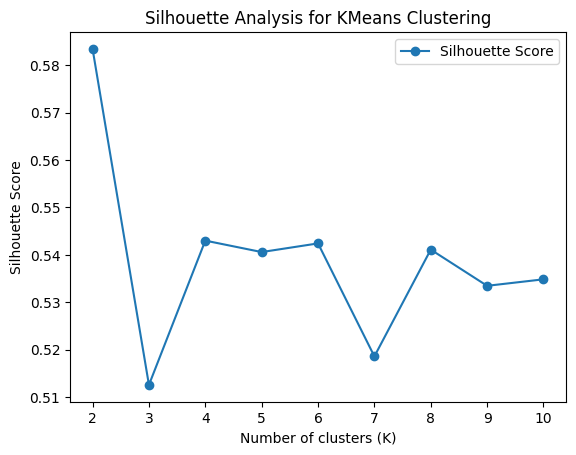

In [50]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# List of values for K (adjust the range as needed)
k_values = range(2, 11)

inertias = []
silhouette_scores = []

for k in k_values:
    # Fit the KMeans model for each K
    kmeans = KMeans(n_clusters=k, random_state=0)  # Set random_state for reproducibility
    kmeans.fit(data)

    # Calculate inertia (within-cluster sum of squares)
    inertia = kmeans.inertia_

    # Calculate silhouette score
    silhouette_score_val = silhouette_score(data, kmeans.labels_)

    inertias.append(inertia)
    silhouette_scores.append(silhouette_score_val)

# Plot the elbow method
import matplotlib.pyplot as plt

plt.plot(k_values, inertias, '-o', label='Inertia')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans Clustering')
plt.legend()
plt.show()

# Plot the silhouette analysis
plt.plot(k_values, silhouette_scores, '-o', label='Silhouette Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for KMeans Clustering')
plt.legend()
plt.show()

# Interpretation:
# - Look for the 'elbow' in the inertia plot - a sharp decrease followed by a slower decrease.
# - Look for the highest silhouette score, indicating better cluster separation.

# Based on the plots, choose the optimal K value that balances these criteria.


### 5. KMeans Model Prediction

Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.

In [51]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K value based on analysis (replace with your actual K value)
k = 4

# Fit the KMeans model with the chosen K
kmeans = KMeans(n_clusters=k, random_state=0)  # Set random_state for reproducibility
kmeans.fit(data)

# Calculate and store silhouette score
silhouette_score_optimal = silhouette_score(data, kmeans.labels_)

# Store cluster labels
cluster_labels = kmeans.labels_

# Print results
print("K Value:", k)
print("Silhouette Score:", silhouette_score_optimal)
print("Cluster Labels:", cluster_labels)


K Value: 4
Silhouette Score: 0.5429935106958337
Cluster Labels: [3 1 2 ... 2 3 2]


### 7. DBSCAN model training - Scikit-Learn

Using sklear.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.

In [52]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
# List of epsilon values
epsilon_values = [0.1, 0.2, 0.5, 1, 2]

# List of min_samples values
min_samples_values = [3, 4, 5, 6]

# Maximum silhouette score and corresponding parameters (initialize)
max_silhouette_score = -1
best_epsilon = None
best_min_samples = None

# Nested loop to try different hyperparameter combinations
for epsilon in epsilon_values:
    for min_samples in min_samples_values:
        # Create and fit the DBSCAN model
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        dbscan.fit(data)

        # Calculate silhouette score
        silhouette_score_val = silhouette_score(data, dbscan.labels_)

        # Update maximum score and parameters if necessary
        if silhouette_score_val > max_silhouette_score:
            max_silhouette_score = silhouette_score_val
            best_epsilon = epsilon
            best_min_samples = min_samples

# Print the best hyperparameters and silhouette score
print("Best Epsilon:", best_epsilon)
print("Best Min Samples:", best_min_samples)
print("Max Silhouette Score:", max_silhouette_score)


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)